# 2.5 Visual Weather Systems - CNN
### The following script contains the following:

#### 1. Import data libraries
#### 2. Input additional requirements
#### 3. Load data and 
#### 4. Create CNN model
#### 5. Plot accuracy and loss
#### 6. Display confusion matrix
#### 7. Generate images and predictions

--------------------------------------------------------------------------------------------------------------------------------------------------------
# 1. Import data libraries
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 2. Input requirements

In [15]:
#show all plots
%matplotlib inline

#turning off warning feature
warnings.filterwarnings('ignore')

# 3. Load data and images

In [17]:
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\02 Data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [18]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# 4. Create CNN model

In [20]:
#this is a CNN to categorize the weather images

epochs = 45  # Increase epochs
dropout_rate = 0.5  # Adjust dropout rate
learning_rate = 0.001  # Adjust learning rate

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(dropout_rate,seed=5)(x)  # Adjusted dropout rate
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [21]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"]) #mean_squared_error
model.fit(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

Epoch 1/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.4652 - loss: 1.1291 - val_accuracy: 0.6027 - val_loss: 0.8068
Epoch 2/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.7672  
Epoch 3/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 405ms/step - accuracy: 0.6550 - loss: 0.7643 - val_accuracy: 0.7946 - val_loss: 0.7142
Epoch 4/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 0.5139  
Epoch 5/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.7366 - loss: 0.6692 - val_accuracy: 0.8080 - val_loss: 0.6267
Epoch 6/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.9093  
Epoch 7/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 403ms/step - accuracy: 0.8174 - loss: 0.5030 - val_accuracy: 0.7902 - val_loss: 0.6010
Epoch 8/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - loss: 0.6404  
Epoch 9/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 0.8312 - loss: 0.4352 - val_accuracy: 0.7411 - val_loss: 0.5875
Epoch 10/45

- **notes:** 95% convergence at [45] epochs.

# 5. Plot accuracy and loss

In [31]:
for key, value in model.history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 45
loss: 45
val_accuracy: 23
val_loss: 23


In [33]:
# Check the lengths of all keys in the history
history_data = model.history.history
lengths = [len(v) for v in history_data.values()]

# If lengths are inconsistent, trim them to the smallest length (if needed)
min_length = min(lengths)
for key in history_data:
    history_data[key] = history_data[key][:min_length]

# Now you can create the DataFrame
results = pd.DataFrame(history_data)


In [35]:
results = pd.DataFrame(model.history.history)

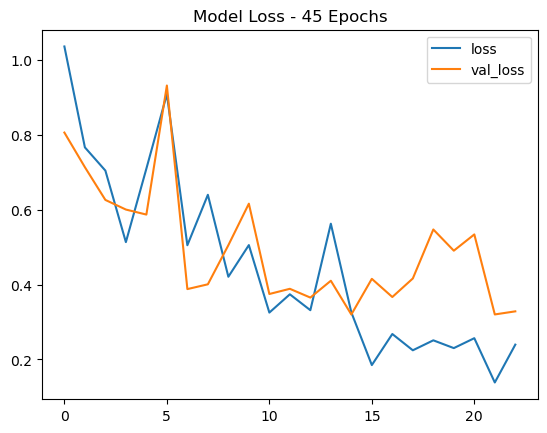

In [37]:
results[['loss','val_loss']].plot(title='Model Loss - 45 Epochs')
plt.savefig('./loss.png')

In [39]:
# Validation loss should typically be a non-zero value


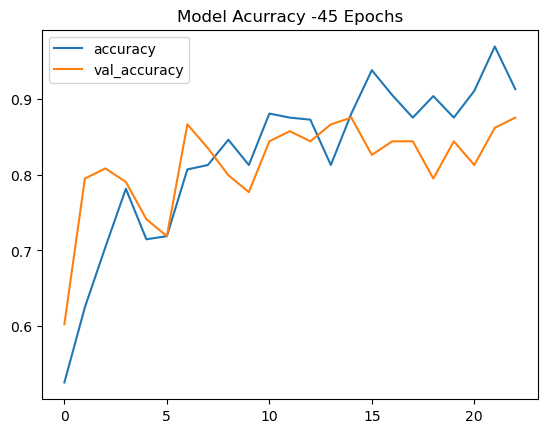

In [41]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy -45 Epochs')
plt.savefig('./accuracy.png')

In [43]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

# Validation accuracy should typically be a non-zero value between 0 and 1, representing the model's performance on a separate validation dataset.

Accuracy: 0.9125431776046753, Val_Accuracy: 0.875
Loss: 0.23973430693149567, Val_Loss: 0.328742653131485


# 5. Display confusion matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


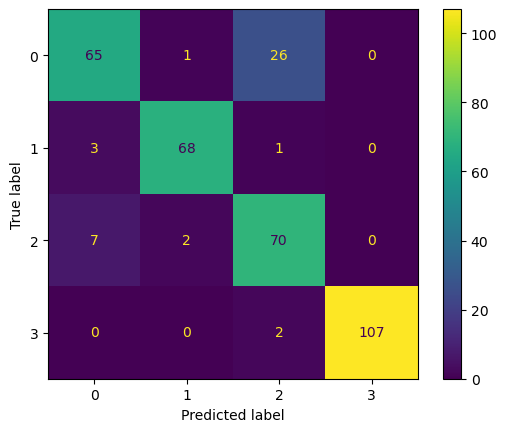

In [46]:
#collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# 6. Generate images and their predictions

In [48]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


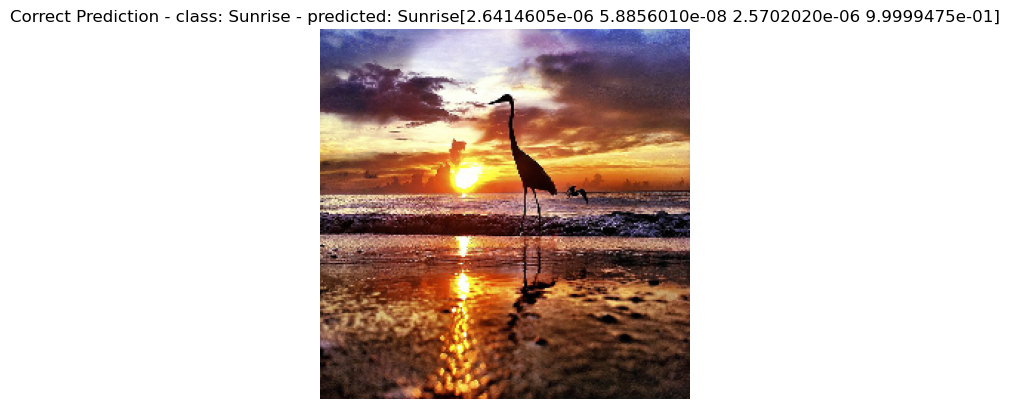

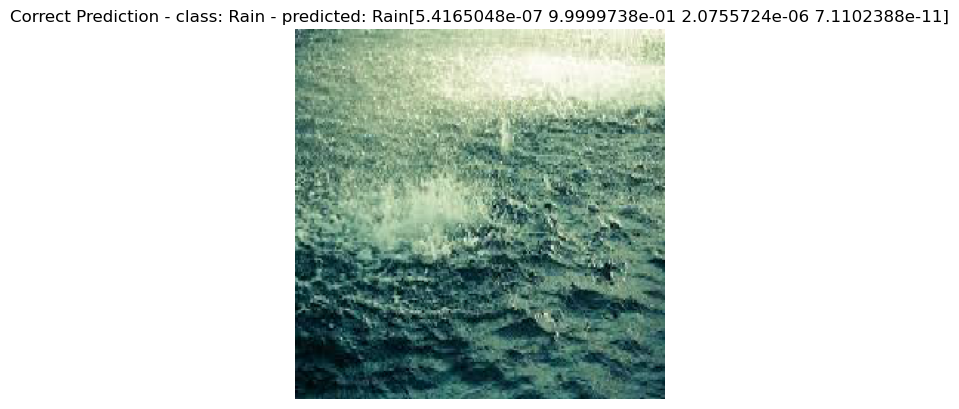

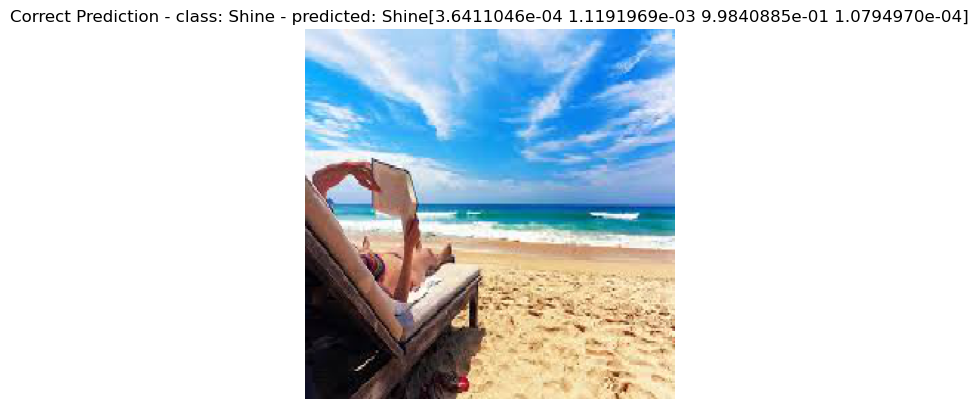

In [49]:
predict_one(model, 3) #<--you can show multiple pictures with this command. Just fill in the number you want to see.


-------------------------------------------